In [170]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [24]:
df=pd.read_csv("./FIFA_2018_player.csv")

In [25]:
#大致查看信息
df.head()

,ID,name,full_name,nationality,league,club,age,birth_date,height_cm,weight_kg,eur_value,eur_wage
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,Spanish Primera División,Real Madrid CF,32,1985-02-05,185.0,80.0,95500000.0,565000.0
1,158023,L. Messi,Lionel Messi,Argentina,Spanish Primera División,FC Barcelona,30,1987-06-24,170.0,72.0,105000000.0,565000.0
2,190871,Neymar,Neymar da Silva Santos Jr.,Brazil,French Ligue 1,Paris Saint-Germain,25,1992-02-05,175.0,68.0,123000000.0,280000.0
3,176580,L. Suárez,Luis Suárez,Uruguay,Spanish Primera División,FC Barcelona,30,1987-01-24,182.0,86.0,97000000.0,510000.0
4,167495,M. Neuer,Manuel Neuer,Germany,German Bundesliga,FC Bayern Munich,31,1986-03-27,193.0,92.0,61000000.0,230000.0


In [94]:
#查看数据类型
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17741 entries, 0 to 17993
Data columns (total 12 columns):
ID             17741 non-null int64
name           17741 non-null object
full_name      17741 non-null object
nationality    17741 non-null object
league         17741 non-null object
club           17741 non-null object
age            17741 non-null int64
birth_date     17741 non-null object
height_cm      17741 non-null float64
weight_kg      17741 non-null float64
eur_value      17741 non-null float64
eur_wage       17741 non-null float64
dtypes: float64(4), int64(2), object(6)
memory usage: 2.4+ MB


In [95]:
#查看统计性数据
df.describe()

,ID,age,height_cm,weight_kg,eur_value,eur_wage
count,17741.000000,17741.000000,17741.000000,17741.000000,1.774100e+04,17741.000000
mean,207756.835522,25.088552,181.277944,75.397103,2.405130e+06,11667.887943
std,32421.331072,4.616413,6.692701,6.993980,5.377511e+06,23173.181633
min,16.000000,16.000000,155.000000,49.000000,1.000000e+04,1000.000000
25%,192621.000000,21.000000,177.000000,70.000000,3.250000e+05,2000.000000
50%,214175.000000,25.000000,181.000000,75.000000,7.000000e+05,4000.000000
75%,231624.000000,28.000000,186.000000,80.000000,2.100000e+06,12000.000000
max,241489.000000,47.000000,205.000000,110.000000,1.230000e+08,565000.000000


In [27]:
#清洗数据
df.count()

ID             17994
name           17994
full_name      17994
nationality    17994
league         17741
club           17741
age            17994
birth_date     17994
height_cm      17994
weight_kg      17994
eur_value      17994
eur_wage       17994
dtype: int64

In [28]:
#查看league的空数据
df[df["league"].isnull()]

,ID,name,full_name,nationality,league,club,age,birth_date,height_cm,weight_kg,eur_value,eur_wage
163,188152,Oscar,Oscar dos Santos Emboaba,Brazil,NaN,NaN,25,1991-09-09,179.0,67.0,0.0,0.0
168,184826,Adrien Silva,Adrien S. Perruchet Silva,Portugal,NaN,NaN,28,1989-03-15,175.0,69.0,0.0,0.0
271,177413,A. Witsel,Axel Witsel,Belgium,NaN,NaN,28,1989-01-12,186.0,73.0,0.0,0.0
480,176733,M. Berg,Marcus Berg,Sweden,NaN,NaN,30,1986-08-17,184.0,74.0,0.0,0.0
494,169195,Renato Augusto,Renato Augusto,Brazil,NaN,NaN,29,1988-02-08,186.0,86.0,0.0,0.0
657,170733,Gervinho,Gervais Yao Kouassi,Ivory Coast,NaN,NaN,30,1987-05-27,179.0,66.0,0.0,0.0
856,182879,B. Dzsudzsák,Balázs Dzsudzsák,Hungary,NaN,NaN,30,1986-12-23,179.0,72.0,0.0,0.0
889,185090,B. Moukandjo,Benjamin Moukandjo,Cameroon,NaN,NaN,28,1988-11-12,180.0,74.0,0.0,0.0
910,181271,B. Dočkal,Bořek Dočkal,Czech Republic,NaN,NaN,28,1988-09-30,182.0,72.0,0.0,0.0
987,193869,Gil,Carlos Gilberto do Nascimento Silva,Brazil,NaN,NaN,30,1987-06-12,192.0,87.0,0.0,0.0


In [29]:
#删除空数据
df.drop(df[df["league"].isnull()].index,inplace=True)

In [30]:
#查看是否删除成功
df[df["league"].isnull()]

,ID,name,full_name,nationality,league,club,age,birth_date,height_cm,weight_kg,eur_value,eur_wage


In [32]:
#查看整体信息
df.describe()

,ID,age,height_cm,weight_kg,eur_value,eur_wage
count,17741.000000,17741.000000,17741.000000,17741.000000,1.774100e+04,17741.000000
mean,207756.835522,25.088552,181.277944,75.397103,2.404317e+06,11667.887943
std,32421.331072,4.616413,6.692701,6.993980,5.377693e+06,23173.181633
min,16.000000,16.000000,155.000000,49.000000,0.000000e+00,1000.000000
25%,192621.000000,21.000000,177.000000,70.000000,3.250000e+05,2000.000000
50%,214175.000000,25.000000,181.000000,75.000000,7.000000e+05,4000.000000
75%,231624.000000,28.000000,186.000000,80.000000,2.100000e+06,12000.000000
max,241489.000000,47.000000,205.000000,110.000000,1.230000e+08,565000.000000


In [33]:
#对身价为0的进行处理
df[df["eur_value"]<100]

,ID,name,full_name,nationality,league,club,age,birth_date,height_cm,weight_kg,eur_value,eur_wage
2199,3665,B. Nivet,Benjamin Nivet,France,French Ligue 1,ES Troyes AC,40,1977-01-02,178.0,75.0,0.0,16000.0
3105,17605,T. Simons,Timmy Simons,Belgium,Belgian First Division A,Club Brugge KV,40,1976-12-11,186.0,80.0,0.0,14000.0
3272,176900,M. Candelo,Máyer Candelo,Colombia,Colombian Primera A,Asociacion Deportivo Cali,40,1977-02-20,170.0,65.0,0.0,2000.0
7734,148745,K. Wæhler,Kjetil Wæhler,Norway,Norwegian Eliteserien,Sogndal,41,1976-03-16,182.0,78.0,0.0,2000.0
17628,149727,P. Jennings,Patrick Jennings,England,Rep. Ireland Premier Division,St. Patrick's Athletic,37,1979-09-24,177.0,81.0,0.0,1000.0
17990,11728,B. Richardson,Barry Richardson,England,English League Two,Wycombe Wanderers,47,1969-08-05,185.0,77.0,0.0,1000.0


In [34]:
#填充为平均值 不影响其他数据
df["eur_value"].replace(0,df["eur_value"].mean(),inplace=True)

In [37]:
#查看替换成功
df.loc[2199]

ID                       3665
name                 B. Nivet
full_name      Benjamin Nivet
nationality            France
league         French Ligue 1
club             ES Troyes AC
age                        40
birth_date         1977-01-02
height_cm                 178
weight_kg                  75
eur_value         2.40432e+06
eur_wage                16000
Name: 2199, dtype: object

In [41]:
#查看有无重复值
df[df.duplicated()]

,ID,name,full_name,nationality,league,club,age,birth_date,height_cm,weight_kg,eur_value,eur_wage


In [42]:
df.head()

,ID,name,full_name,nationality,league,club,age,birth_date,height_cm,weight_kg,eur_value,eur_wage
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,Spanish Primera División,Real Madrid CF,32,1985-02-05,185.0,80.0,95500000.0,565000.0
1,158023,L. Messi,Lionel Messi,Argentina,Spanish Primera División,FC Barcelona,30,1987-06-24,170.0,72.0,105000000.0,565000.0
2,190871,Neymar,Neymar da Silva Santos Jr.,Brazil,French Ligue 1,Paris Saint-Germain,25,1992-02-05,175.0,68.0,123000000.0,280000.0
3,176580,L. Suárez,Luis Suárez,Uruguay,Spanish Primera División,FC Barcelona,30,1987-01-24,182.0,86.0,97000000.0,510000.0
4,167495,M. Neuer,Manuel Neuer,Germany,German Bundesliga,FC Bayern Munich,31,1986-03-27,193.0,92.0,61000000.0,230000.0


In [43]:
df.describe()

,ID,age,height_cm,weight_kg,eur_value,eur_wage
count,17741.000000,17741.000000,17741.000000,17741.000000,1.774100e+04,17741.000000
mean,207756.835522,25.088552,181.277944,75.397103,2.405130e+06,11667.887943
std,32421.331072,4.616413,6.692701,6.993980,5.377511e+06,23173.181633
min,16.000000,16.000000,155.000000,49.000000,1.000000e+04,1000.000000
25%,192621.000000,21.000000,177.000000,70.000000,3.250000e+05,2000.000000
50%,214175.000000,25.000000,181.000000,75.000000,7.000000e+05,4000.000000
75%,231624.000000,28.000000,186.000000,80.000000,2.100000e+06,12000.000000
max,241489.000000,47.000000,205.000000,110.000000,1.230000e+08,565000.000000


In [44]:
#判断清洗数据完成 根据 describe 

In [49]:
#按照离散型维度 分析  此处选国家
nation_data=df.groupby("nationality",as_index=False).count()[["nationality","name"]]
nation_data

,nationality,name
0,Afghanistan,3
1,Albania,37
2,Algeria,59
3,Angola,15
4,Antigua & Barbuda,4
5,Argentina,962
6,Armenia,14
7,Australia,231
8,Austria,266
9,Azerbaijan,7


In [51]:
#处理nation_data
nation_data.rename(columns={"name":"player_count"},inplace=True)
#对球员数量排序
nation_data.sort_values("player_count",ascending=False)

,nationality,player_count
44,England,1631
57,Germany,1147
135,Spain,1020
53,France,966
5,Argentina,962
18,Brazil,803
75,Italy,800
29,Colombia,591
78,Japan,471
105,Netherlands,430


In [52]:
#连续型数据维度分析 选年龄

In [182]:
#先分桶
bins=np.arange(15,50,5)
bins_data=pd.cut(df["age"],bins)
#根据分桶分组
age_counts=df["age"].groupby(bins_data).count()
age_counts

age
(15, 20]    3300
(20, 25]    6749
(25, 30]    5234
(30, 35]    2192
(35, 40]     258
(40, 45]       7
Name: age, dtype: int64

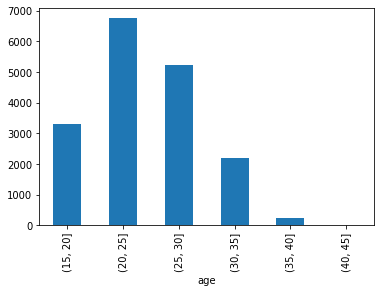

In [183]:
#作柱状图
age_counts.plot(kind="bar")

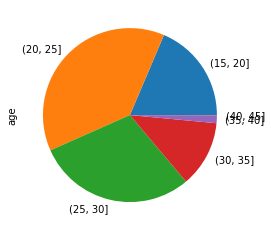

In [166]:
#作饼图
age_counts.plot(kind="pie")

In [184]:
#将age_counts转化为数据框
age_counts=pd.DataFrame(age_counts)
age_counts

,age
age,
"(15, 20]",3300
"(20, 25]",6749
"(25, 30]",5234
"(30, 35]",2192
"(35, 40]",258
"(40, 45]",7


In [185]:
#重新设置索引和列名
age_counts.rename(columns={"age":"player_count"},inplace=True)
#drop=False 索引列会被还原为普通列  rop=True 索引列会删除
age_counts.reset_index(drop=False,inplace=True)
#重新设置索引和列名
age_counts.rename(columns={"age":"age_group"},inplace=True)
age_counts

,age_group,player_count
0,"(15, 20]",3300
1,"(20, 25]",6749
2,"(25, 30]",5234
3,"(30, 35]",2192
4,"(35, 40]",258
5,"(40, 45]",7


TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

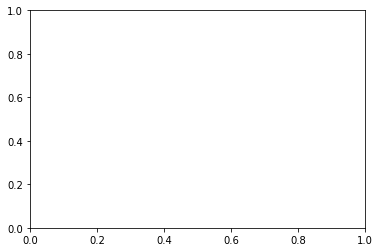

In [186]:
#作图
plt.bar(age_counts["age_group"],age_counts["player_count"],align =  'center')

<BarContainer object of 6 artists>

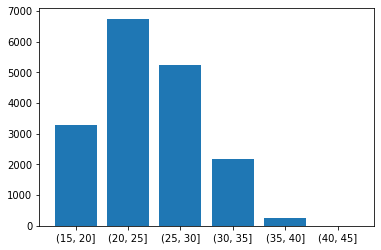

In [187]:
#因为上图的错误左慈修改 原因是横纵轴的数据类型有问题
plt.bar(age_counts["age_group"].astype(str),age_counts["player_count"])